#Importig networkx Library

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from tabulate import tabulate


Please Enter Number of nodes n:6
Please Enter Number of edges m:10
Please Enter Source Node:u
Please Enter Destination Node:v
Please Enter Weight:2
Please Enter Source Node:u
Please Enter Destination Node:w
Please Enter Weight:5
Please Enter Source Node:u
Please Enter Destination Node:x
Please Enter Weight:1
Please Enter Source Node:x
Please Enter Destination Node:v
Please Enter Weight:2
Please Enter Source Node:v
Please Enter Destination Node:w
Please Enter Weight:3
Please Enter Source Node:x
Please Enter Destination Node:w
Please Enter Weight:3
Please Enter Source Node:w
Please Enter Destination Node:y
Please Enter Weight:1
Please Enter Source Node:x
Please Enter Destination Node:y
Please Enter Weight:1
Please Enter Source Node:w
Please Enter Destination Node:z
Please Enter Weight:5
Please Enter Source Node:y
Please Enter Destination Node:z
Please Enter Weight:2


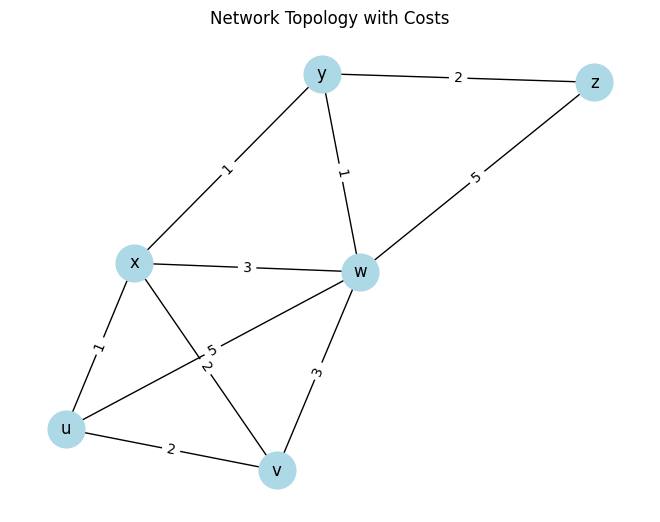


Dijkstra's Algorithm Step-by-Step Table:
+--------+--------+-----+------+------+------+------+------+
|   Step | N'     | u   | v    | w    | x    | y    | z    |
+========+========+=====+======+======+======+======+======+
|      0 |        | 0,- | ∞,-  | ∞,-  | ∞,-  | ∞,-  | ∞,-  |
+--------+--------+-----+------+------+------+------+------+
|      1 | u      | -   | 2,u* | 5,u* | 1,u* | ∞,-  | ∞,-  |
+--------+--------+-----+------+------+------+------+------+
|      2 | ux     | -   | 2,u  | 4,x* | -    | 2,x* | ∞,-  |
+--------+--------+-----+------+------+------+------+------+
|      3 | uxv    | -   | -    | 4,x  | -    | 2,x  | ∞,-  |
+--------+--------+-----+------+------+------+------+------+
|      4 | uxvy   | -   | -    | 3,y* | -    | -    | 4,y* |
+--------+--------+-----+------+------+------+------+------+
|      5 | uxvyw  | -   | -    | -    | -    | -    | 4,y  |
+--------+--------+-----+------+------+------+------+------+
|      6 | uxvywz | -   | -    | -    | -  

In [ ]:

#The first line contains the number of nodes n and edges m
#Each of the next m lines contains src_node, dest_node, weight
n=int(input("Please Enter Number of nodes n:"))
m=int(input("Please Enter Number of edges m:"))
edges=[]
for edge in range (m):
  src_node=str(input("Please Enter Source Node:"))
  dest_node=str(input("Please Enter Destination Node:"))
  weight=int(input("Please Enter Weight:"))
  edges.append( (src_node,dest_node,weight) )


G = nx.Graph()
# Add to graph
for src, dest, cost in edges:
    G.add_edge(src, dest, cost=cost)

# Step 3: Choose a layout
pos = nx.spring_layout(G)  # Positions for all nodes

# Step 4: Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrows=True)

# Step 5: Draw edge labels (the costs)
edge_labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Step 6: Show the plot
plt.title("Network Topology with Costs")
plt.show()

# Modified dijkstra_trace function to work with NetworkX graph
def dijkstra_trace(graph, start_node):
    # Get all nodes from the graph
    all_nodes = list(graph.nodes())

    dist = {node: float('inf') for node in all_nodes}
    prev = {node: None for node in all_nodes}
    # Use list to preserve visit order for N' column
    visited_order = []
    dist[start_node] = 0
    pq = [(0, start_node)]

    steps = []
    step_num = 0

    # Initial Step (Step 0)
    row = [step_num, ''.join(visited_order)]
    for node in all_nodes:
        d = "∞" if dist[node] == float('inf') else str(dist[node])
        p = "-" if prev[node] is None else prev[node]
        # In the initial step, no nodes are visited, so show D,P
        row.append(f"{d},{p}")
    steps.append(row)

    while pq:
        d_curr, u = heapq.heappop(pq)


        # Check if u is already in the visited_order list
        if u in visited_order:
            continue
        # Add node to the list in order of visiting
        visited_order.append(u)
        step_num += 1

        # Create a temporary copy of dist and prev to track changes in this step
        dist_snapshot = dist.copy()
        prev_snapshot = prev.copy()
        updated_nodes = set() # To track which nodes were updated in this step


        # Iterate over neighbors in a NetworkX graph
        for v in graph.neighbors(u):
            # Access edge weight using graph[u][v]['cost']
            alt = dist[u] + graph[u][v]['cost']
            if alt < dist[v]:
                # Store the old values before updating
                old_dist_v = dist[v]
                old_prev_v = prev[v]

                dist[v] = alt
                prev[v] = u
                heapq.heappush(pq, (alt, v))

                # Mark this node as updated if its distance or predecessor changed
                # Check against the snapshot to see if it was changed IN THIS STEP
                if dist[v] != dist_snapshot.get(v) or prev[v] != prev_snapshot.get(v):
                     updated_nodes.add(v)


        # This block records the state of the algorithm after processing the neighbors of the current node `u`.
        row = [step_num, ''.join(visited_order)]
        for node in all_nodes:
            # If the node is already in the visited_order, display "-"
            if node in visited_order:
                 row.append("-")
            else:
                # Otherwise, display the current distance and predecessor, with "*" if updated
                d = "∞" if dist[node] == float('inf') else str(dist[node])
                p = "-" if prev[node] is None else prev[node]

                # Add indicator if this node was updated in this step
                if node in updated_nodes:
                     row.append(f"{d},{p}*") # Add an asterisk to indicate update
                else:
                     row.append(f"{d},{p}")
        steps.append(row)

    # Table Header
    headers = ["Step", "N'"] + [f"{node}" for node in all_nodes]
    print("\nDijkstra's Algorithm Step-by-Step Table:")
    print(tabulate(steps, headers=headers, tablefmt="grid"))

# Run
# Pass the NetworkX graph object 'G' to the function
dijkstra_trace(G, start_node="u")


print(edges)




Enter the node to build the forwarding table and draw least cost paths from:u

Forwarding Table for Node u:
+---------------+--------+------------+------------------+
| Destination   |   Cost | Next Hop   | Path             |
+===============+========+============+==================+
| v             |      2 | v          | u -> v           |
+---------------+--------+------------+------------------+
| w             |      3 | x          | u -> x -> y -> w |
+---------------+--------+------------+------------------+
| x             |      1 | x          | u -> x           |
+---------------+--------+------------+------------------+
| y             |      2 | x          | u -> x -> y      |
+---------------+--------+------------+------------------+
| z             |      4 | x          | u -> x -> y -> z |
+---------------+--------+------------+------------------+


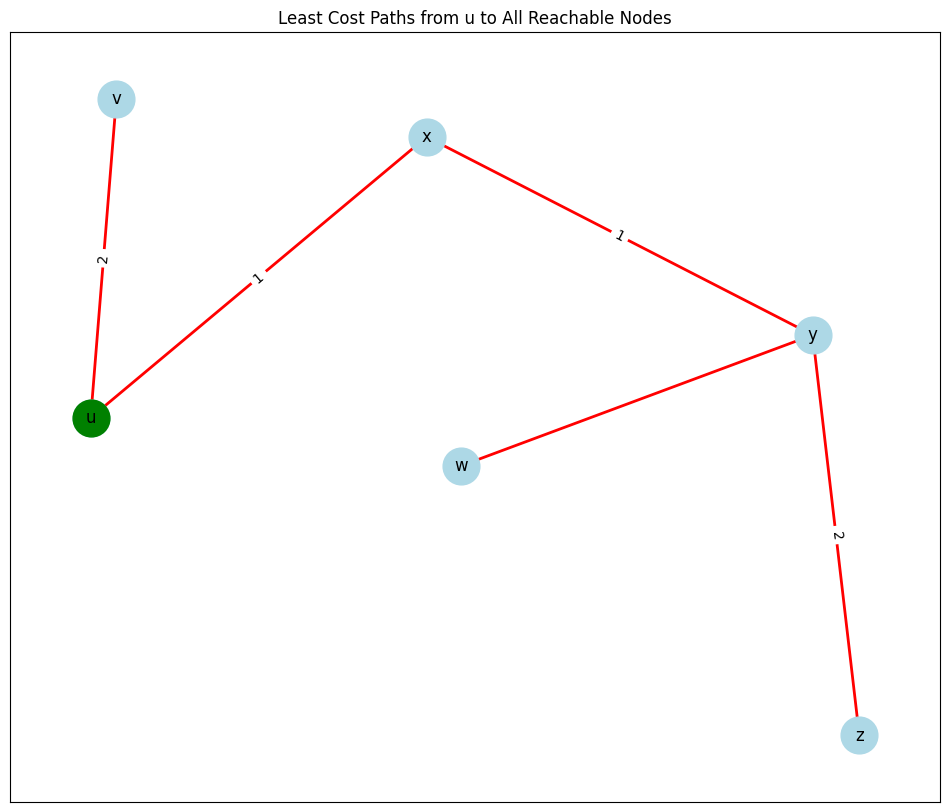

In [ ]:
# add part to draw least cost path and forwarding table for any of the nodes based on the user input

# Function to reconstruct the path from the 'prev' dictionary
def reconstruct_path(prev, start_node, end_node):
    path = []
    curr = end_node
    while curr is not None:
        path.append(curr)
        if curr == start_node:
            break
        curr = prev[curr]
    path.reverse()
    # Return path only if the end_node was reachable from the start_node
    return path if path and path[0] == start_node else []

# Function to build the forwarding table for a given start node
def build_forwarding_table(graph, start_node):
    # Run Dijkstra's algorithm to get the shortest paths and predecessors
    # We can reuse parts of the dijkstra_trace logic or use networkx built-in function
    # Let's use networkx.shortest_path and networkx.shortest_path_length for simplicity
    try:
        paths = nx.shortest_path(graph, source=start_node, weight='cost')
        distances = nx.shortest_path_length(graph, source=start_node, weight='cost')
    except nx.NetworkXNoPath:
        print(f"No path exists from {start_node} to some nodes.")
        return {}, {} # Return empty table and paths if no path exists
    except nx.NodeNotFound as e:
        print(f"\nError building forwarding table: Node not found - {e}")
        return {}, {} # Return empty table and paths if node not found


    forwarding_table = {}
    # Iterate through all destination nodes
    for dest_node in graph.nodes():
        if dest_node == start_node:
            continue # Skip the start node itself

        if dest_node in paths:
            path = paths[dest_node]
            cost = distances[dest_node]
            if len(path) > 1:
                next_hop = path[1] # The next node in the shortest path
            else:
                 next_hop = "-" # Should not happen for nodes other than start_node if reachable

            forwarding_table[dest_node] = {"Cost": cost, "Next Hop": next_hop, "Path": " -> ".join(path)}
        else:
             forwarding_node= {"Cost": float('inf'), "Next Hop": "-", "Path": "No Path"}


    return forwarding_table, paths # Also return the paths dictionary


# Get user input for the node to build the forwarding table for and draw paths from
start_node_for_all_paths = str(input("\nEnter the node to build the forwarding table and draw least cost paths from:"))

# Build and display the forwarding table and get the paths
forwarding_table, all_shortest_paths = build_forwarding_table(G, start_node=start_node_for_all_paths)

if forwarding_table:
    print(f"\nForwarding Table for Node {start_node_for_all_paths}:")
    # Prepare data for tabulate
    table_data = []
    for dest, info in forwarding_table.items():
         cost_str = "∞" if info["Cost"] == float('inf') else str(info["Cost"])
         table_data.append([dest, cost_str, info["Next Hop"], info["Path"]])

    print(tabulate(table_data, headers=["Destination", "Cost", "Next Hop", "Path"], tablefmt="grid"))

# Draw the least cost paths from the starting node to all other nodes
if all_shortest_paths:
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)  # Use the same layout for consistency

    # Draw all nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_labels(G, pos)

    # Collect all edges that are part of any shortest path from the start node.
    # This list will be used to draw ONLY these edges and their labels.
    highlight_edges = []
    for target_node, path_nodes in all_shortest_paths.items():
        if target_node != start_node_for_all_paths:
            path_edges = list(zip(path_nodes[:-1], path_nodes[1:]))
            highlight_edges.extend(path_edges)

    # Remove duplicate edges
    highlight_edges = list(set(highlight_edges))

    # Create a dictionary of edge labels ONLY for the highlighted edges
    full_edge_labels = nx.get_edge_attributes(G, 'cost')
    highlight_edge_labels = {edge: full_edge_labels[edge] for edge in highlight_edges if edge in full_edge_labels}


    # Draw ONLY the edges that are part of the shortest paths (in red)
    nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, edge_color='red', width=2, arrows=True)

    # Draw edge labels ONLY for the highlighted edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlight_edge_labels)


    # Highlight the start node
    nx.draw_networkx_nodes(G, pos, nodelist=[start_node_for_all_paths], node_color='green', node_size=700)

    plt.title(f"Least Cost Paths from {start_node_for_all_paths} to All Reachable Nodes")
    plt.show()

In [ ]:
print(edges)

[('u', 'v', 2), ('u', 'y', 5), ('v', 'y', 4)]
